In [66]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from numpy.random import randn

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [2]:
%matplotlib inline

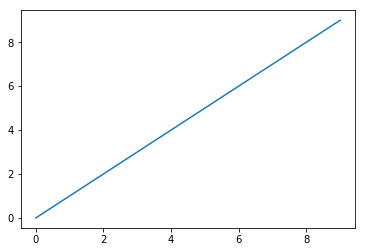

In [13]:
plt.plot(np.arange(10))

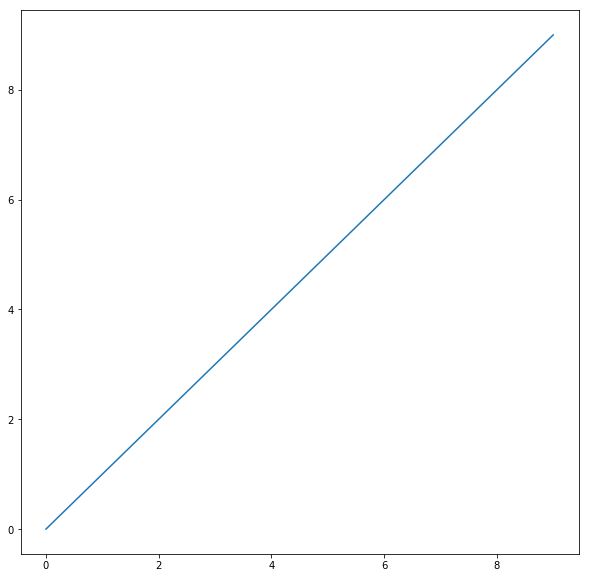

In [24]:
#Create a figure object
fig = plt.figure(figsize = [10,10], edgecolor = 'r', dpi=300)
plt.plot(np.arange(10))

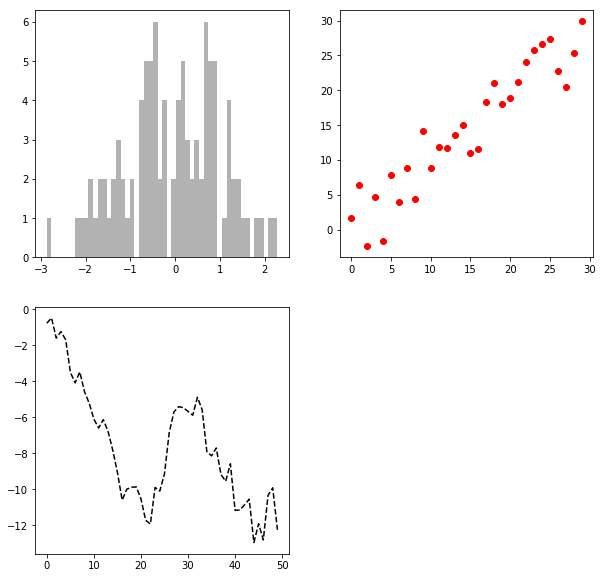

In [41]:
fig = plt.figure(figsize = [10,10], edgecolor = 'r', dpi=300)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.hist(randn(100), bins=50, color='k', alpha=0.3) #alpha value adjusts the grey scale. alpha=1 -> black
ax2.scatter(np.arange(30), np.arange(30)+3*randn(30), color='red')
ax3.plot(randn(50).cumsum(),'k--')

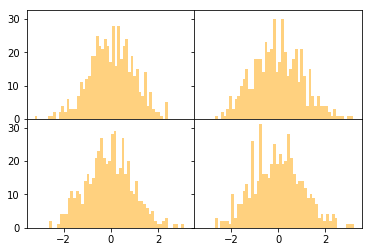

In [57]:
fig2,axes2 = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes2[i,j].hist(randn(500),bins=50, color='orange', alpha=0.5)
# Adjust subplots spacing
plt.subplots_adjust(wspace=0,hspace=0)

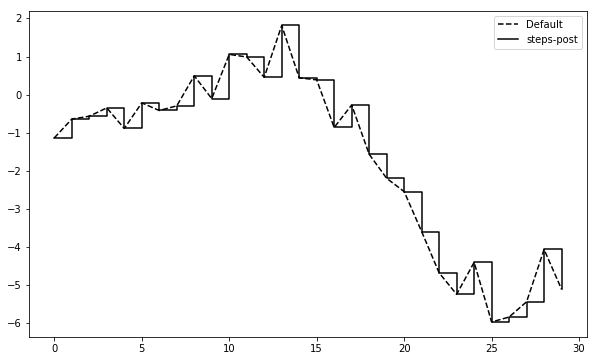

In [67]:
data = randn(30).cumsum()
fig =  plt.figure(figsize=[10,6])
plt.plot(data,'k--', label='Default')
plt.plot(data,'k-', drawstyle='steps-post',label='steps-post')
plt.legend(loc='best')

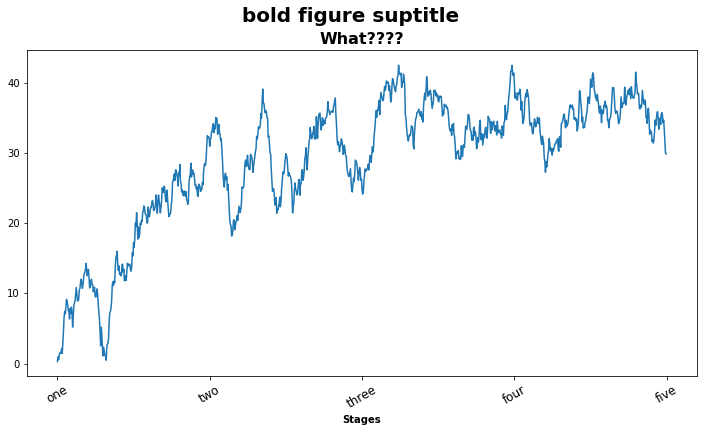

In [97]:
fig = plt.figure(figsize=[12,6])
fig.suptitle('bold figure suptitle', fontsize=20, fontweight='bold')

ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())
ax.set_xticks(np.arange(0,1250,250))
ax.set_xticklabels(['one','two','three','four','five'],rotation=30, fontsize=12,)
ax.set_title('What????',fontsize=16, fontweight='bold')
ax.set_xlabel('Stages', fontweight="bold")

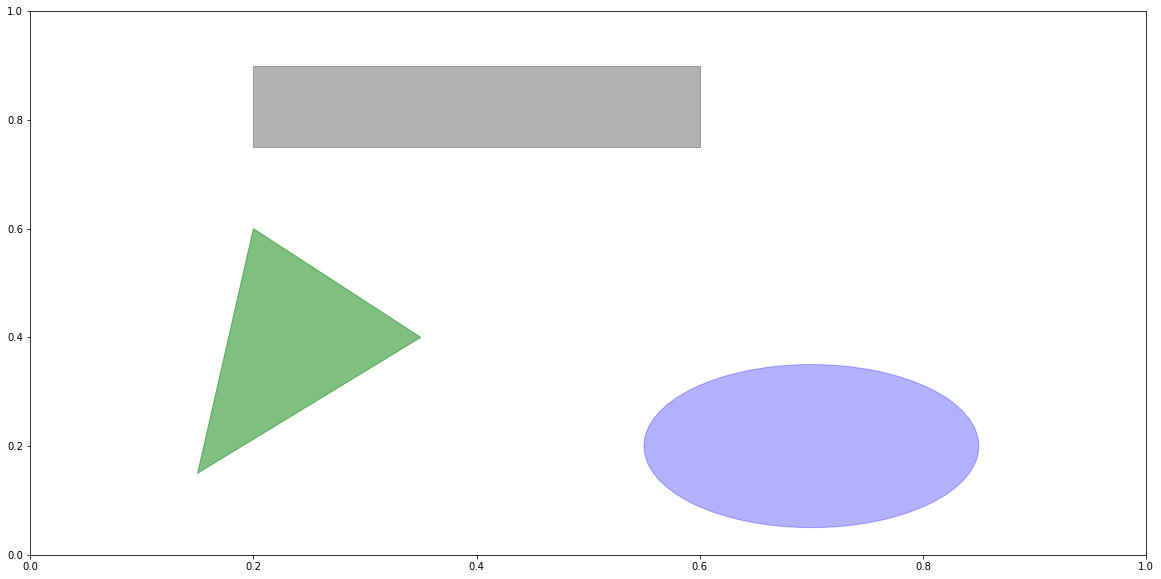

In [103]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## Global matplotlib Configuration  

In [102]:
# default figrue size
plt.rc('figure', figsize=(20,10))

## Plotting Functions in Pandas

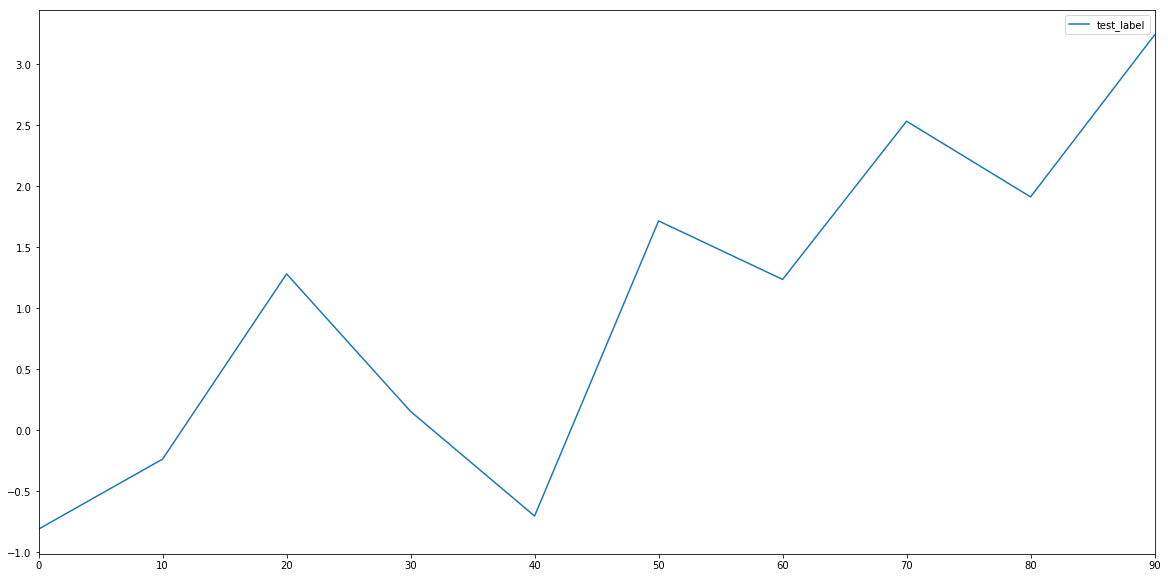

In [107]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot(label = 'test_label', legend=True)

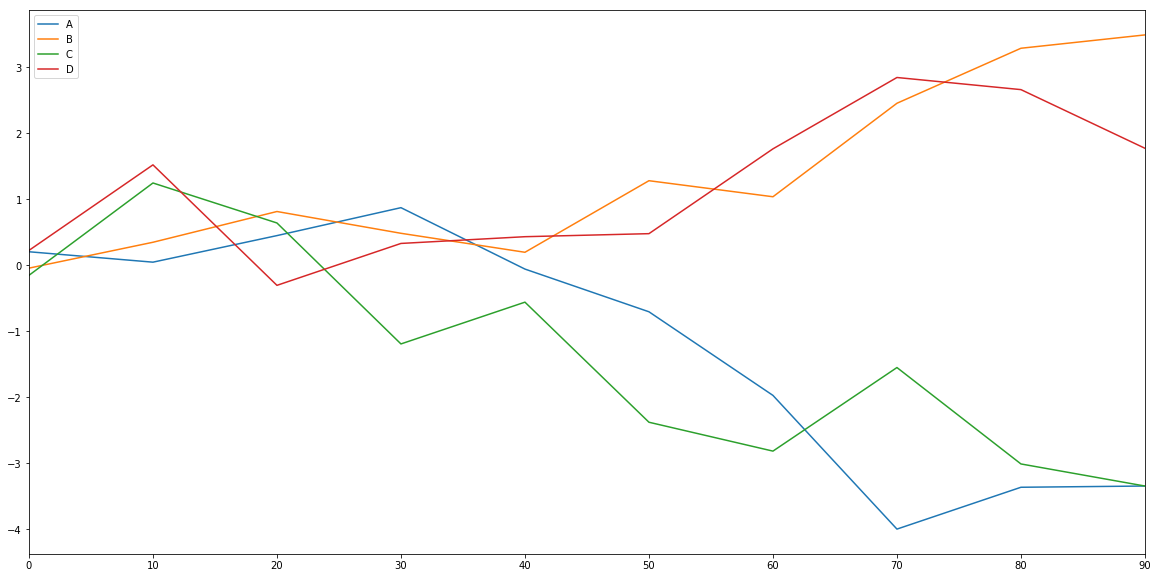

In [109]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),columns=['A', 'B', 'C', 'D'],index=np.arange(0, 100, 10))
df.plot()

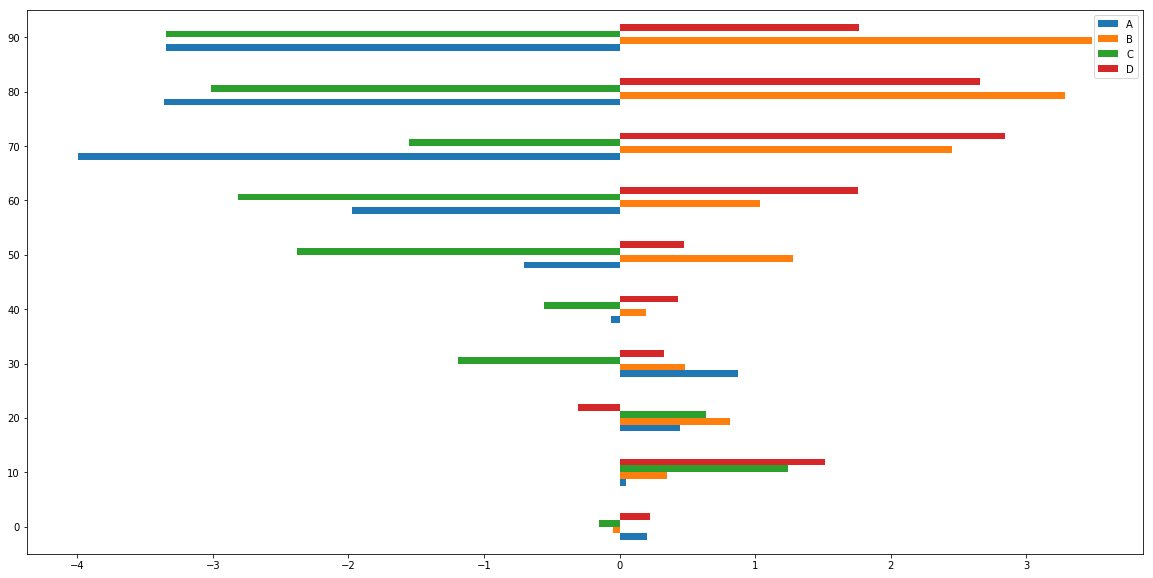

In [111]:
df.plot(kind='barh')

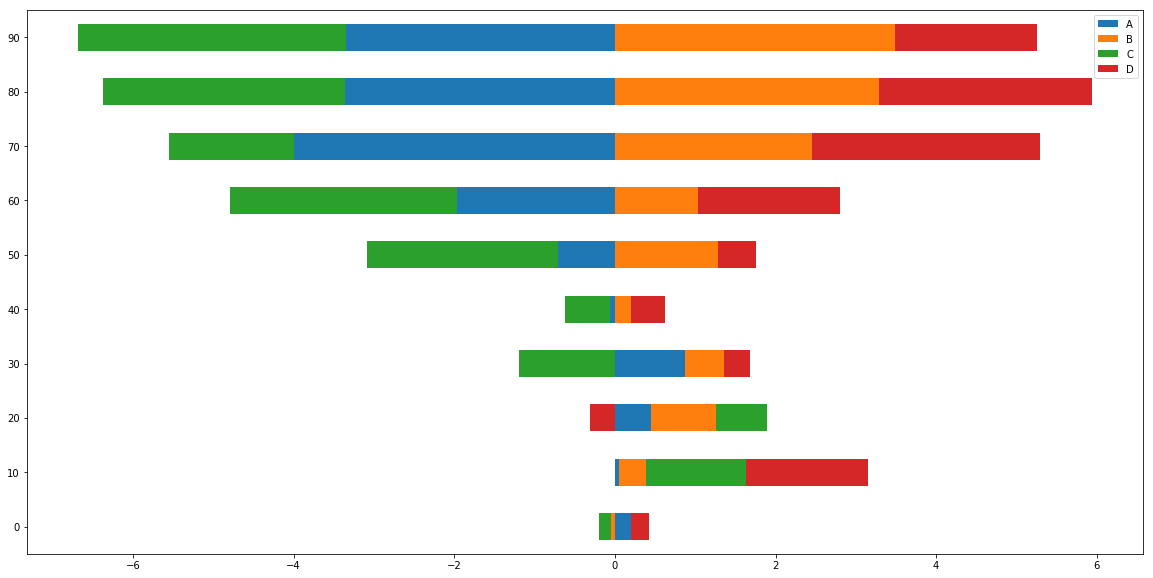

In [113]:
df.plot(kind='barh', stacked=True)

##  Plotting Maps 

In [3]:
df = pd.read_csv('Ch08/Haiti.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 182.5+ KB


In [12]:
df[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [14]:
df[['CATEGORY']][:10]

,CATEGORY
0,"1. Urgences | Emergency, 3. Public Health,"
1,"1. Urgences | Emergency, 2. Urgences logistiqu..."
2,"2. Urgences logistiques | Vital Lines, 8. Autr..."
3,"1. Urgences | Emergency,"
4,"1. Urgences | Emergency,"
5,"5e. Communication lines down,"
6,"4. Menaces | Security Threats, 4e. Assainissem..."
7,"4. Menaces | Security Threats,"
8,"2. Urgences logistiques | Vital Lines, 2f. San..."
9,"2. Urgences logistiques | Vital Lines, 2d. Ref..."


In [16]:
df.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [62]:
# set data filters 
data = df[(df.LATITUDE > 18) & 
          (df.LONGITUDE > -75) &
          (df.LONGITUDE < -70) &
          (df.CATEGORY.notnull())
         ]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3575 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3575 non-null int64
INCIDENT TITLE    3575 non-null object
INCIDENT DATE     3575 non-null object
LOCATION          3574 non-null object
DESCRIPTION       3575 non-null object
CATEGORY          3575 non-null object
LATITUDE          3575 non-null float64
LONGITUDE         3575 non-null float64
APPROVED          3575 non-null object
VERIFIED          3575 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 209.5+ KB


In [56]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code, names.strip()

def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

In [50]:
#test
get_english('2a. Urgences logistriques | Vital Lines')

('2a', 'Vital Lines')

In [55]:
all_cats = get_all_categories(data.CATEGORY)
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']

'Food Shortage'

In [58]:
# set up the dataframe template
all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data),len(code_index))),
                        index=data.index, columns=code_index)
dummy_frame.ix[:,:6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3575 entries, 0 to 3592
Data columns (total 6 columns):
1     3575 non-null float64
1a    3575 non-null float64
1b    3575 non-null float64
1c    3575 non-null float64
1d    3575 non-null float64
2     3575 non-null float64
dtypes: float64(6)
memory usage: 195.5 KB


In [63]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row,codes] = 1
data = data.join(dummy_frame.add_prefix('category_'))

In [71]:
def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                   lllon=-75, urlon=-71):
    #create polar steroegraphic Basemap Instance 
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon+lllon)/2,
                lat_0=(urlat+lllat)/2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f'
                )
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

TypeError: input must be an array, list, tuple or scalar

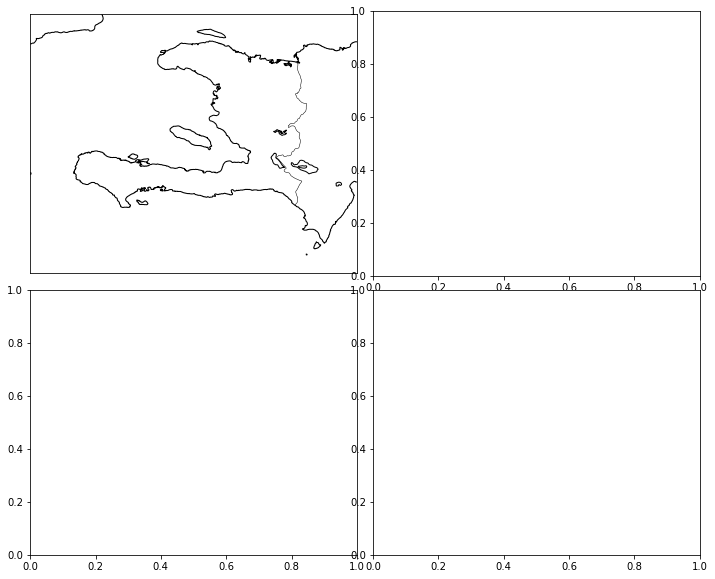

In [72]:
#WIP
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
    lllon=lllon, urlon=urlon)
    cat_data = data[data['category_%s' % code] == 1]
    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE, cat_data.LATITUDE)
    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

In [ ]:
#read shapefile 

In [74]:
cat_data = data[data['category_%s' % code] == 1]
cat_data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,4036,"Food needed, House collapsed in 1ere Section S...",15/03/2010 14:18,Assumed 1ere Section Salagnac and Salagnac de ...,"i'm living in Nip Department, First section sa...","1a. Highly vulnerable, 2. Urgences logistiques...",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,4034,Tent shelter and food needed on Lapot St. Carr...,22/03/2010 10:49,"unable to find street, mapped to Carrefour","We need tent, cover, rice. Uneted Nation never...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.534260,-72.408960,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,4033,Help needed in Brochette,17/03/2010 13:40,"Brochette 99, Brochette, west of Carrefour","We live in brochette 99, we don't find any hel...","2. Urgences logistiques | Vital Lines, 2b. Pen...",18.525190,-72.458954,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,4021,school materials needed in Mirebalais,27/04/2010 14:44,Mirebalais,"I'm Duclervil Saintody, principal of &lt;Ecole...","1. Urgences | Emergency, 2. Urgences logistiqu...",18.825717,-72.103271,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,4018,Eliante Valentin,03/05/2010 20:05,"664 Blv. Jean Jacques Dessalines, Port-au-Prin...",SOS ! HELP! Eliante Valentin (sleeping in fron...,"2d. Refuge | Shelter needed, 2a. Penurie d'ali...",18.539167,-72.335000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,4010,Starvation in La Gonave,28/01/2010 10:38,There was no specific location within the Island,"Please, can we still be counted as victims of ...","2. Urgences logistiques | Vital Lines, 2a. Pen...",18.829100,-73.015000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,4009,"children need help, in Corail, Jeremie.",27/03/2010 15:52,"Corail, Jeremie","[13727646] · Good morning, it's urgences,urgen...","1b. Urgence medicale | Medical Emergency, 2. U...",18.650000,-74.116667,YES,NO,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,3999,Food needed on Delmas 41,12/04/2010 14:36,"Delmas 41, no further location information given.","It was said that the aid is finished, there is...","2. Urgences logistiques | Vital Lines, 2a. Pen...",18.547300,-72.301000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,3997,Help needed in Croix des Bouquets,12/03/2010 09:14,"At intersection of routes 300, 3, and 102",Croix-des-bouquets did not find anything.,"2. Urgences logistiques | Vital Lines, 2b. Pen...",18.576850,-72.228740,YES,YES,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
